# Udacity Nano Degree Program-  Data Scientist

  ## Author: Durga Parida
 
 ### Project 1- Data Science Blog Project
 
 ### Problem Statement:
 
I work for a  major Telecommunication Company. Currently our Company is facing a higher Customer Churn issue. The Churn rate is growing up in very quarter especially for Video subscribers.

The  Customers are disconnecting their services due to multiple issues, related to Billing, Promotion drops, High price points, Technical issues , End of Contract period etc. This is impacting Company’s bottom line revenue, while operating cost remains static. This is causing enough pressure for Company to prevent revenue leakage by retaining the customers.

####  Key Questions to be answered:

1. What are the Key attributes/features  of already-Churned Video Customers
2. Which Customers are most likely to churn in Future
3. What can be done to reduce the Churn rate


#### In this project, we will design and deploy a supervised Model(such  as Logistics regression) to predict if a Customer will churn in future by training the Model with  Customer data(Churned and Non-Churned)

 
 ### Solution Approach:
 
We will be using Supervised Learning  Binary Classification Model, i.e. Logistic regression to predict the Customer Churn. 
Logistic Regression is one of the most valuable  machine learning models and mainly used when the dependent variable is categorical. In our case, Churn value is a categorical variable(Yes/No)

We will be applying the ML model work flow as the part of solution
 
#### The notebook will be broken down into a few steps usinG CRISP-DM Approach:

      1.Business Questions/Issues
      2.Data Understanding
         .Handle Missing Data 
         . Exploratory Visualization
      3.Prepare Data 
         .Feature Engineering and data Transformation
      4. Model Data
          .Splitting the data into train/test sets
          .Defining and training Logistics regression Model
          .Evaluate and Validate the Model
          . Test the Model
      5. Results
      6. Deploy


Import required Packages

###  Section 1- Business Understanding

In [1]:
import io
import os
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns


### -----------------------------------------------------------------------------------------------------------------------------------------------------
## Section 2- Data Understanding

In [2]:
# read in the csv file
churn_data = 'churn_data_v3.csv'

# print out some data
churn_df = pd.read_csv(churn_data)
print('Data shape (rows, cols): ', churn_df.shape)
print()
churn_df.head()

Data shape (rows, cols):  (6601, 23)



,prim_lang_desc,acct_sts_cd,acct_sts_desc,acct_create_dt,acct_frst_actv_dt,acct_lst_discnt_dt,acct_lst_rcnt_dt,dtv_frst_actv_dt,dtv_actv_ind,blng_pmt_mthd_desc,...,dtv_lst_rcnt_dt,dtv_base_pkg_prd_cd,dtv_prev_bal_amt,dtv_lst_bl_bal_due_amt,dtv_lst_bl_pmt_mthd_cd,dtv_lst_bl_pmt_mthd_desc,contrct_type_cd,lst_cntrct_expr_dt,lst_cntrct_dur_in_mnth,cmbnd_bl_ind
0,English,A,Active,7/15/2006,7/22/2006,1/1/1900,1/1/1900,7/15/2006,Y,Cash Payment,...,5/4/2016,88834864,246.93,246.93,8,Cash Payment,?,1/1/1900,0.0,?
1,English,A,Active,9/7/2006,9/11/2006,1/1/1900,1/1/1900,9/7/2006,Y,Cash Payment,...,9/19/2015,89336994,134.77,128.36,8,Cash Payment,B,1/8/2020,24.0,?
2,English,A,Active,12/14/2006,12/19/2006,1/1/1900,1/1/1900,12/14/2006,Y,Credit Card Payment,...,9/15/2017,89336964,140.39,135.18,2,Credit Card Payment,B,9/14/2019,24.0,?
3,English,A,Active,4/20/2006,4/21/2006,1/1/1900,1/1/1900,4/21/2006,Y,True Credit Card,...,1/1/1900,89337264,126.72,126.72,E,True Credit Card,?,1/1/1900,0.0,?
4,English,A,Active,10/14/2003,10/17/2003,1/1/1900,1/1/1900,4/18/2006,Y,True Credit Card,...,1/1/1900,88834854,291.88,399.36,E,True Credit Card,?,1/1/1900,0.0,?


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7DC08BC50>,
      dtype=object)

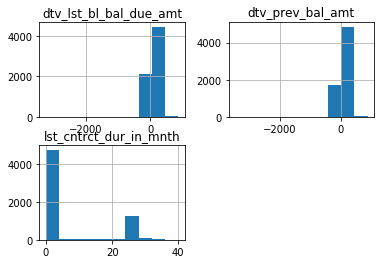

In [3]:
# Draw Histogram of numeric variables
churn_df.hist()

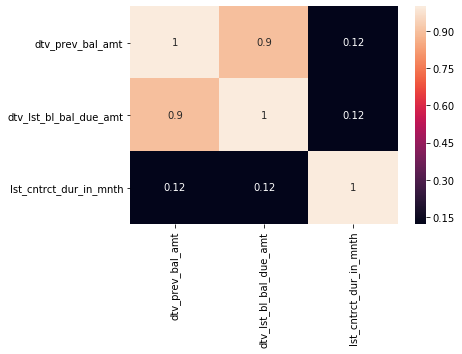

In [4]:
# Generated the Heatmap
sns.heatmap(churn_df.corr(), annot = True)


####  Handle  Missing data

In [5]:
# Determine which columns have NO missing Values
no_nulls = set(churn_df.columns[churn_df.isnull().mean()==0])

print(no_nulls)

{'dtv_actv_ind', 'dtv_lst_bl_bal_due_amt', 'blng_type_desc', 'dtv_lst_rcnt_dt', 'dtv_frst_actv_dt', 'dtv_base_pkg_prd_cd', 'blng_pmt_mthd_desc', 'acct_sts_desc', 'rc1_acct_ind', 'acct_create_dt', 'acct_lst_discnt_dt', 'acct_sts_cd', 'prim_lang_desc', 'acct_frst_actv_dt', 'contrct_type_cd', 'dtv_lst_discnt_dt', 'dtv_lst_bl_pmt_mthd_desc', 'cmbnd_bl_ind', 'dtv_prev_bal_amt', 'acct_lst_rcnt_dt', 'dtv_lst_bl_pmt_mthd_cd'}


In [6]:
# # Determine which columns have MOST missing Values

most_missing_cols = set(churn_df.columns[churn_df.isnull().mean() > 0.75])
print(most_missing_cols)

set()


In [7]:
# Get total count of NaN in Dat Frame
nan_cnt = churn_df.isnull().sum().sum()
print(" Total Nan count", nan_cnt)

nan_rows = churn_df.shape[0] - churn_df.dropna().shape[0]
print("# of Rows with Nan", nan_rows)

#drop data points with ALL Null values
clean_churn_df = churn_df.dropna(axis = 0,how= 'all') 


print('(clean-1) rows, cols: ', clean_churn_df.shape)



 Total Nan count 418
# of Rows with Nan 209
(clean-1) rows, cols:  (6601, 23)


In [8]:
 # Fill numeric columns with the mean
num_vars = clean_churn_df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
        clean_churn_df[col].fillna((clean_churn_df[col].mean()), inplace=True)
        print(col)
        

dtv_prev_bal_amt
dtv_lst_bl_bal_due_amt
lst_cntrct_dur_in_mnth


In [9]:
# take a look at Cleaned Churn Data Frame
clean_churn_df.head(10)

,prim_lang_desc,acct_sts_cd,acct_sts_desc,acct_create_dt,acct_frst_actv_dt,acct_lst_discnt_dt,acct_lst_rcnt_dt,dtv_frst_actv_dt,dtv_actv_ind,blng_pmt_mthd_desc,...,dtv_lst_rcnt_dt,dtv_base_pkg_prd_cd,dtv_prev_bal_amt,dtv_lst_bl_bal_due_amt,dtv_lst_bl_pmt_mthd_cd,dtv_lst_bl_pmt_mthd_desc,contrct_type_cd,lst_cntrct_expr_dt,lst_cntrct_dur_in_mnth,cmbnd_bl_ind
0,English,A,Active,7/15/2006,7/22/2006,1/1/1900,1/1/1900,7/15/2006,Y,Cash Payment,...,5/4/2016,88834864,246.93,246.93,8,Cash Payment,?,1/1/1900,0.0,?
1,English,A,Active,9/7/2006,9/11/2006,1/1/1900,1/1/1900,9/7/2006,Y,Cash Payment,...,9/19/2015,89336994,134.77,128.36,8,Cash Payment,B,1/8/2020,24.0,?
2,English,A,Active,12/14/2006,12/19/2006,1/1/1900,1/1/1900,12/14/2006,Y,Credit Card Payment,...,9/15/2017,89336964,140.39,135.18,2,Credit Card Payment,B,9/14/2019,24.0,?
3,English,A,Active,4/20/2006,4/21/2006,1/1/1900,1/1/1900,4/21/2006,Y,True Credit Card,...,1/1/1900,89337264,126.72,126.72,E,True Credit Card,?,1/1/1900,0.0,?
4,English,A,Active,10/14/2003,10/17/2003,1/1/1900,1/1/1900,4/18/2006,Y,True Credit Card,...,1/1/1900,88834854,291.88,399.36,E,True Credit Card,?,1/1/1900,0.0,?
5,English,A,Active,5/25/2006,5/27/2006,1/1/1900,1/1/1900,5/25/2006,Y,Cash Payment,...,6/27/2013,88834854,859.32,543.71,8,Cash Payment,B,1/20/2021,24.0,?
6,English,A,Active,8/11/2006,12/27/2016,1/1/1900,1/1/1900,8/11/2006,Y,Cash Payment,...,11/6/2015,89336964,140.46,140.46,8,Cash Payment,?,1/1/1900,0.0,?
7,English,A,Active,8/30/2006,9/7/2006,1/1/1900,1/1/1900,8/30/2006,Y,True Credit Card,...,2/8/2018,88834874,140.90,144.83,E,True Credit Card,B,2/7/2020,24.0,?
8,English,A,Active,3/22/2006,7/8/2017,1/1/1900,1/1/1900,3/22/2006,Y,True Credit Card,...,7/8/2017,88834044,90.80,90.80,E,True Credit Card,B,7/7/2019,24.0,?
9,English,A,Active,10/19/2006,10/23/2006,1/1/1900,1/1/1900,10/19/2006,Y,Cash Payment,...,8/24/2014,89337034,165.92,210.66,8,Cash Payment,B,9/12/2019,24.0,?


#### Create new tenure variable
 1. For already-churned customers: tenure = DTV last Disconnect date - DTV Activation Date
 2. For Not-churned customers: tenure =  Today Date - DTV Activation Date

In [10]:
from datetime import datetime
from datetime import date

#  Create new tenure variable

#For already-churned customers: tenure = DTV last Disconnect date - DTV Activation Date
#For Not-churned customers: tenure =  Today Date - DTV Activation Date

# Get Today's date
today = date.today()
print(today)

clean_churn_df['tenure'] = 0

# iterating over rows using iterrows() function  
for index, row in clean_churn_df.iterrows():
    
        day_diff = 0
        empty_dt = '1/1/1900'
        disc_dt = row['dtv_lst_discnt_dt']
        actv_dt = row['dtv_frst_actv_dt'] 
        recn_dt = row['dtv_lst_rcnt_dt']
                 
        
        disc_dt = datetime.strptime(disc_dt, "%m/%d/%Y").date()
        actv_dt = datetime.strptime(actv_dt, "%m/%d/%Y").date()
        recn_dt = datetime.strptime(recn_dt, "%m/%d/%Y").date()
        empty_dt = datetime.strptime(empty_dt, "%m/%d/%Y").date()
  
              
        if recn_dt > empty_dt and disc_dt > empty_dt:
                if recn_dt > disc_dt:
                     day_diff = today- recn_dt
                else:        
                    day_diff = disc_dt - recn_dt
        
       
        if  recn_dt == empty_dt and disc_dt > empty_dt:
                day_diff = disc_dt- actv_dt
       
        if  disc_dt == empty_dt and recn_dt > empty_dt:
                day_diff = today-recn_dt
        
        # Active account  
        if  disc_dt == empty_dt and recn_dt == empty_dt:
                day_diff = today-actv_dt
        
        clean_churn_df.at[index,'tenure'] = day_diff.days
 
        if index ==0:
            print(day_diff.days)
            print(disc_dt,actv_dt, recn_dt,empty_dt)

# take a look at updated Data frame
clean_churn_df.head(10)

2019-10-14
1258
1900-01-01 2006-07-15 2016-05-04 1900-01-01


,prim_lang_desc,acct_sts_cd,acct_sts_desc,acct_create_dt,acct_frst_actv_dt,acct_lst_discnt_dt,acct_lst_rcnt_dt,dtv_frst_actv_dt,dtv_actv_ind,blng_pmt_mthd_desc,...,dtv_base_pkg_prd_cd,dtv_prev_bal_amt,dtv_lst_bl_bal_due_amt,dtv_lst_bl_pmt_mthd_cd,dtv_lst_bl_pmt_mthd_desc,contrct_type_cd,lst_cntrct_expr_dt,lst_cntrct_dur_in_mnth,cmbnd_bl_ind,tenure
0,English,A,Active,7/15/2006,7/22/2006,1/1/1900,1/1/1900,7/15/2006,Y,Cash Payment,...,88834864,246.93,246.93,8,Cash Payment,?,1/1/1900,0.0,?,1258
1,English,A,Active,9/7/2006,9/11/2006,1/1/1900,1/1/1900,9/7/2006,Y,Cash Payment,...,89336994,134.77,128.36,8,Cash Payment,B,1/8/2020,24.0,?,1486
2,English,A,Active,12/14/2006,12/19/2006,1/1/1900,1/1/1900,12/14/2006,Y,Credit Card Payment,...,89336964,140.39,135.18,2,Credit Card Payment,B,9/14/2019,24.0,?,759
3,English,A,Active,4/20/2006,4/21/2006,1/1/1900,1/1/1900,4/21/2006,Y,True Credit Card,...,89337264,126.72,126.72,E,True Credit Card,?,1/1/1900,0.0,?,4924
4,English,A,Active,10/14/2003,10/17/2003,1/1/1900,1/1/1900,4/18/2006,Y,True Credit Card,...,88834854,291.88,399.36,E,True Credit Card,?,1/1/1900,0.0,?,4927
5,English,A,Active,5/25/2006,5/27/2006,1/1/1900,1/1/1900,5/25/2006,Y,Cash Payment,...,88834854,859.32,543.71,8,Cash Payment,B,1/20/2021,24.0,?,2300
6,English,A,Active,8/11/2006,12/27/2016,1/1/1900,1/1/1900,8/11/2006,Y,Cash Payment,...,89336964,140.46,140.46,8,Cash Payment,?,1/1/1900,0.0,?,1438
7,English,A,Active,8/30/2006,9/7/2006,1/1/1900,1/1/1900,8/30/2006,Y,True Credit Card,...,88834874,140.90,144.83,E,True Credit Card,B,2/7/2020,24.0,?,613
8,English,A,Active,3/22/2006,7/8/2017,1/1/1900,1/1/1900,3/22/2006,Y,True Credit Card,...,88834044,90.80,90.80,E,True Credit Card,B,7/7/2019,24.0,?,828
9,English,A,Active,10/19/2006,10/23/2006,1/1/1900,1/1/1900,10/19/2006,Y,Cash Payment,...,89337034,165.92,210.66,8,Cash Payment,B,9/12/2019,24.0,?,1877


In [11]:
# Create new Class reponse variable to hold Churn indicator value (0 or 1)
clean_churn_df['Churn'] = 'No'
clean_churn_df.loc[clean_churn_df['dtv_actv_ind']== 'N', 'Churn'] = 'Yes'
clean_churn_df['Churn'].fillna('No', inplace=True)

# take a look at Cleaned Churn Data Frame

clean_churn_df.head(10)

#Download the dataframe to excel

clean_churn_df.to_excel("churn_output.xlsx",sheet_name='Sheet_name_1') 

In [12]:
numerical_features = ["dtv_lst_bl_bal_due_amt","lst_cntrct_dur_in_mnth","tenure"]
clean_churn_df[numerical_features].describe()

#clean_churn_df.describe(include='all')


,dtv_lst_bl_bal_due_amt,lst_cntrct_dur_in_mnth,tenure
count,6601.000000,6601.000000,6601.000000
mean,105.447141,6.036765,4277.959703
std,114.026232,10.391549,1291.429561
min,-3244.600000,0.000000,0.000000
25%,0.000000,0.000000,4630.000000
50%,107.400000,0.000000,4765.000000
75%,160.990000,6.036765,4883.000000
max,874.650000,40.000000,5034.000000


In [13]:
# take a look at Cleaned Churn Data Frame
clean_churn_df.head(10)

,prim_lang_desc,acct_sts_cd,acct_sts_desc,acct_create_dt,acct_frst_actv_dt,acct_lst_discnt_dt,acct_lst_rcnt_dt,dtv_frst_actv_dt,dtv_actv_ind,blng_pmt_mthd_desc,...,dtv_prev_bal_amt,dtv_lst_bl_bal_due_amt,dtv_lst_bl_pmt_mthd_cd,dtv_lst_bl_pmt_mthd_desc,contrct_type_cd,lst_cntrct_expr_dt,lst_cntrct_dur_in_mnth,cmbnd_bl_ind,tenure,Churn
0,English,A,Active,7/15/2006,7/22/2006,1/1/1900,1/1/1900,7/15/2006,Y,Cash Payment,...,246.93,246.93,8,Cash Payment,?,1/1/1900,0.0,?,1258,No
1,English,A,Active,9/7/2006,9/11/2006,1/1/1900,1/1/1900,9/7/2006,Y,Cash Payment,...,134.77,128.36,8,Cash Payment,B,1/8/2020,24.0,?,1486,No
2,English,A,Active,12/14/2006,12/19/2006,1/1/1900,1/1/1900,12/14/2006,Y,Credit Card Payment,...,140.39,135.18,2,Credit Card Payment,B,9/14/2019,24.0,?,759,No
3,English,A,Active,4/20/2006,4/21/2006,1/1/1900,1/1/1900,4/21/2006,Y,True Credit Card,...,126.72,126.72,E,True Credit Card,?,1/1/1900,0.0,?,4924,No
4,English,A,Active,10/14/2003,10/17/2003,1/1/1900,1/1/1900,4/18/2006,Y,True Credit Card,...,291.88,399.36,E,True Credit Card,?,1/1/1900,0.0,?,4927,No
5,English,A,Active,5/25/2006,5/27/2006,1/1/1900,1/1/1900,5/25/2006,Y,Cash Payment,...,859.32,543.71,8,Cash Payment,B,1/20/2021,24.0,?,2300,No
6,English,A,Active,8/11/2006,12/27/2016,1/1/1900,1/1/1900,8/11/2006,Y,Cash Payment,...,140.46,140.46,8,Cash Payment,?,1/1/1900,0.0,?,1438,No
7,English,A,Active,8/30/2006,9/7/2006,1/1/1900,1/1/1900,8/30/2006,Y,True Credit Card,...,140.90,144.83,E,True Credit Card,B,2/7/2020,24.0,?,613,No
8,English,A,Active,3/22/2006,7/8/2017,1/1/1900,1/1/1900,3/22/2006,Y,True Credit Card,...,90.80,90.80,E,True Credit Card,B,7/7/2019,24.0,?,828,No
9,English,A,Active,10/19/2006,10/23/2006,1/1/1900,1/1/1900,10/19/2006,Y,Cash Payment,...,165.92,210.66,8,Cash Payment,B,9/12/2019,24.0,?,1877,No


In [14]:
# Drop Irrelevant Columns
drop=["acct_sts_desc" ,"blng_pmt_mthd_desc", "dtv_lst_bl_pmt_mthd_desc", "acct_sts_cd","dtv_actv_ind","dtv_base_pkg_prd_cd"]
clean_churn_df = clean_churn_df.drop(columns=drop)

# Drop Date Columns
drop=["acct_create_dt", "acct_frst_actv_dt" ,"acct_lst_discnt_dt","acct_lst_rcnt_dt","dtv_frst_actv_dt","lst_cntrct_expr_dt","dtv_lst_discnt_dt","dtv_lst_rcnt_dt"]
clean_churn_df = clean_churn_df.drop(columns=drop)

print(clean_churn_df.dtypes)

print(clean_churn_df.isnull().sum().sum())


clean_churn_df.head(10)

prim_lang_desc             object
blng_type_desc             object
rc1_acct_ind               object
dtv_prev_bal_amt          float64
dtv_lst_bl_bal_due_amt    float64
dtv_lst_bl_pmt_mthd_cd     object
contrct_type_cd            object
lst_cntrct_dur_in_mnth    float64
cmbnd_bl_ind               object
tenure                      int64
Churn                      object
dtype: object
0


,prim_lang_desc,blng_type_desc,rc1_acct_ind,dtv_prev_bal_amt,dtv_lst_bl_bal_due_amt,dtv_lst_bl_pmt_mthd_cd,contrct_type_cd,lst_cntrct_dur_in_mnth,cmbnd_bl_ind,tenure,Churn
0,English,PAPER STMT,Y,246.93,246.93,8,?,0.0,?,1258,No
1,English,PAPER STMT,Y,134.77,128.36,8,B,24.0,?,1486,No
2,English,EBILL STMT,Y,140.39,135.18,2,B,24.0,?,759,No
3,English,PAPER STMT,Y,126.72,126.72,E,?,0.0,?,4924,No
4,English,PAPER STMT,Y,291.88,399.36,E,?,0.0,?,4927,No
5,English,EBILL STMT,Y,859.32,543.71,8,B,24.0,?,2300,No
6,English,PAPER STMT,Y,140.46,140.46,8,?,0.0,?,1438,No
7,English,EBILL STMT,Y,140.90,144.83,E,B,24.0,?,613,No
8,English,EBILL STMT,Y,90.80,90.80,E,B,24.0,?,828,No
9,English,EBILL STMT,Y,165.92,210.66,8,B,24.0,?,1877,No


### --------------------------------------------------------------------------------------------------------------------------------------------------
## Section 2- Exploratory Visualization

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7DE408860>
shape (1, 3)
3


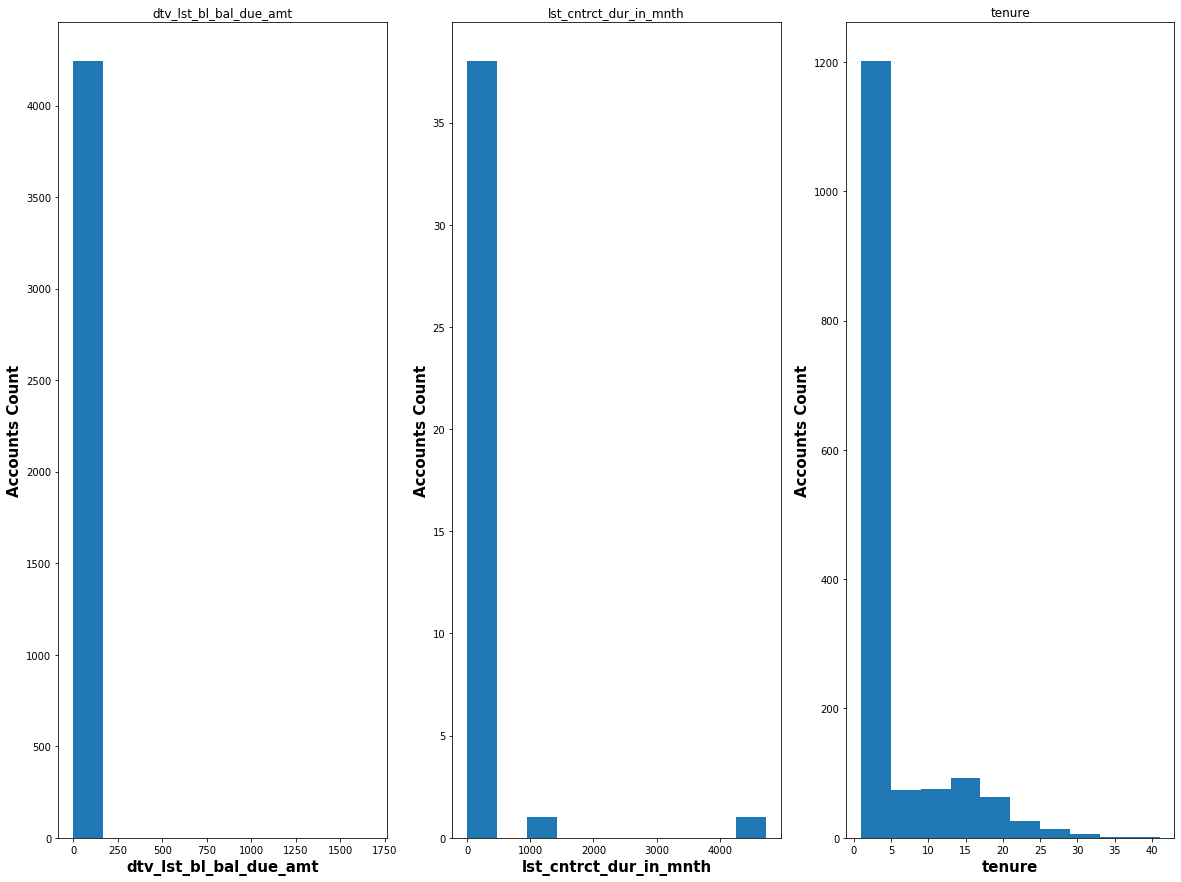

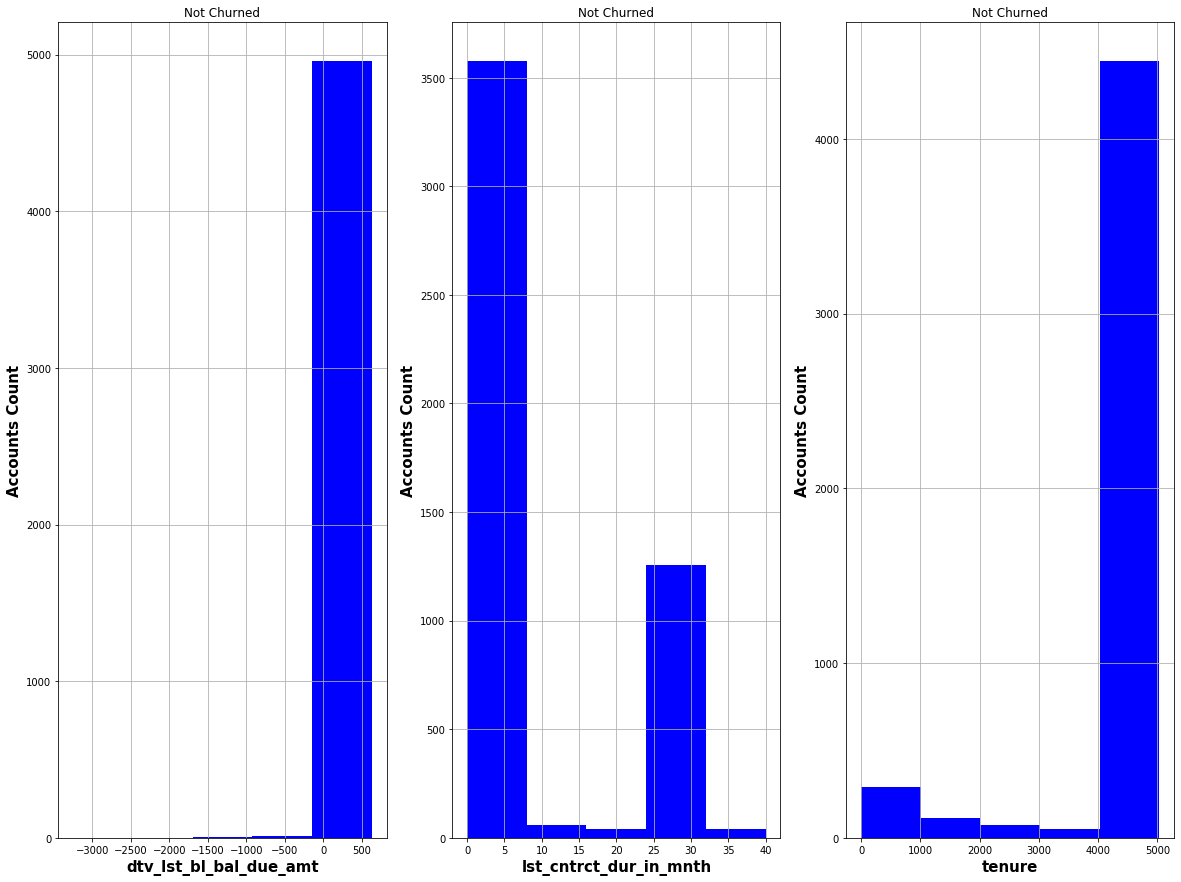

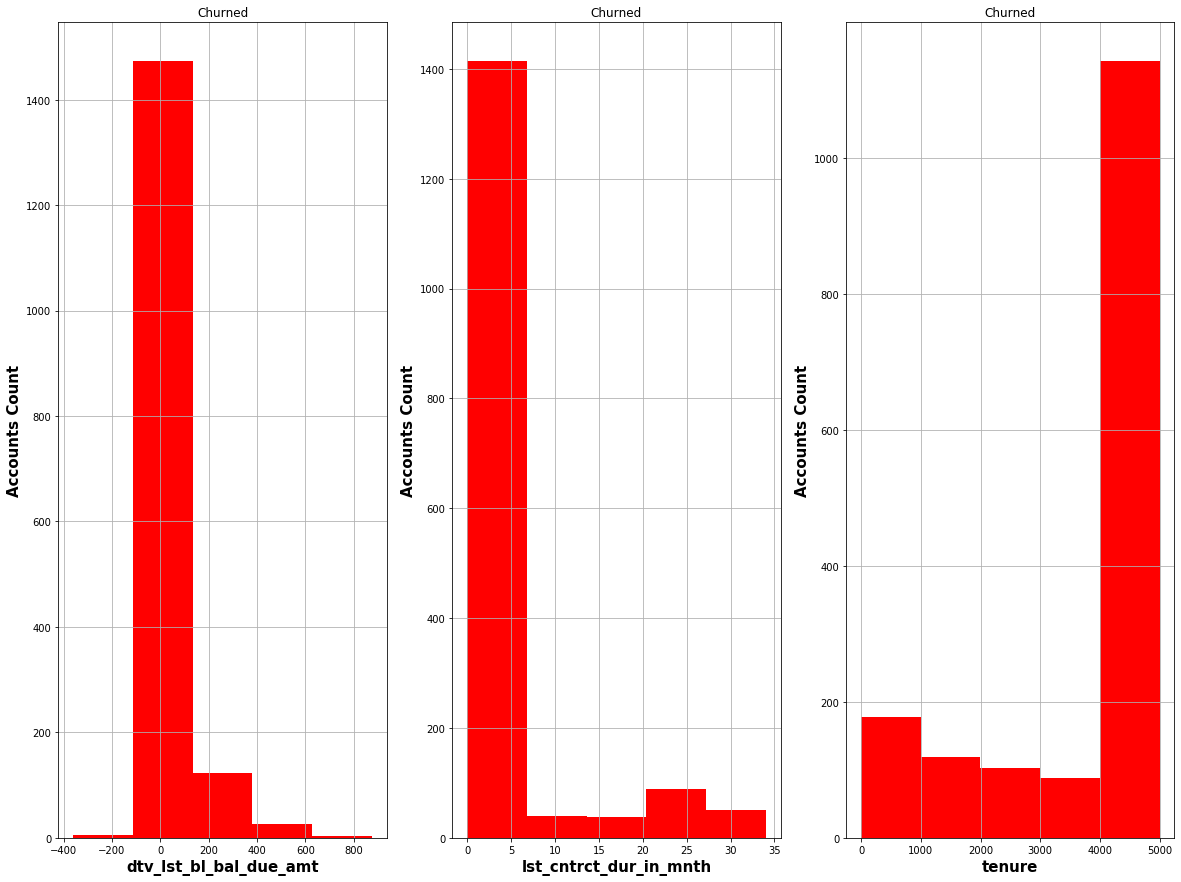

In [15]:
# Let's do Visualization of  Numerical Features using Histograms

# Let's list of features that we want to compare or examine
# few data points with high credit  Balance due amt greater than $1000

my_num_list = ['dtv_lst_bl_bal_due_amt','lst_cntrct_dur_in_mnth','tenure']
n_bins = 30 # define n_bins

num = 0
ROWS, COLS = 1, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 15))
row, col = 0, 0
for i, num_feat in enumerate(my_num_list):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    clean_churn_df[num_feat].value_counts().plot('hist', ax=ax[num]).set_title(num_feat)
    ax[num].set_xlabel(num_feat,fontsize = 15,weight='bold')
    ax[num].set_ylabel("Accounts Count",fontsize = 15, weight='bold')
    num +=1

#-------------------------------------------------------------------------------------------------------------------
# Let's see the distribution in relation to Churn indicator 

ROWS, COLS = 1,3
fig, ax = plt.subplots(ROWS,COLS, figsize=(20,15))

#clean_churn_df[clean_churn_df.Churn == "No"][my_num_list].hist(bins= 5, color="blue", alpha=1.0, ax=ax)
num = 0
row, col = 0, 0
for i, num_feat in enumerate(my_num_list):
    if col == COLS - 1:
        row += 1
    col = i % COLS
  #  print(row, col)
  #  print(ax[row,col])
    
    clean_churn_df[clean_churn_df.Churn == "No"][num_feat].hist(bins= 5, color="blue", alpha=1.0, ax=ax[num]).set_title("Not Churned")
    ax[num].set_xlabel(num_feat,fontsize = 15,weight='bold')
    ax[num].set_ylabel("Accounts Count",fontsize = 15, weight='bold')
    num += 1

#-----------------------------------------------------------------------------------------------------------    
#2nd set-Churn = YES

ROWS, COLS = 1, 3

fig1, ax1 = plt.subplots(ROWS,COLS, figsize=(20,15), squeeze = False)
#clean_churn_df[clean_churn_df.Churn == "No"][my_num_list].hist(bins= 5, color="blue", alpha=1.0, ax=ax)
print(ax1)
num = 0
row, col = 0, 0
print("shape", ax1.shape)

print(len(my_num_list))
for i in  range(len(my_num_list)):
    num_feat = my_num_list[i]
    row = 0
    col = i
   # print(row, col)
   # print(ax1[row,col])
    
    clean_churn_df[clean_churn_df.Churn == "Yes"][num_feat].hist(bins= 5, color="red", alpha=1.0, ax=ax1[row,col]).set_title("Churned")
    ax1[row,col].set_xlabel(num_feat,fontsize = 15,weight='bold')
    ax1[row,col].set_ylabel("Accounts Count",fontsize = 15, weight='bold')
    num += 1
    
#clean_churn_df[clean_churn_df.Churn == "Yes"][my_num_list].hist(bins=5, color="red", alpha=1.0, ax=ax)
 

# Obeservations**----------------------------------------------------------------------------------------------- 
#Higher Balance Due amt(i.e. Customer having multi products(TV, Internet, Wireless etc)) leads to Lower chrun,
# Zero Contract leads to Higher Churn
# # Higher Tenure Customers leads to lower churn

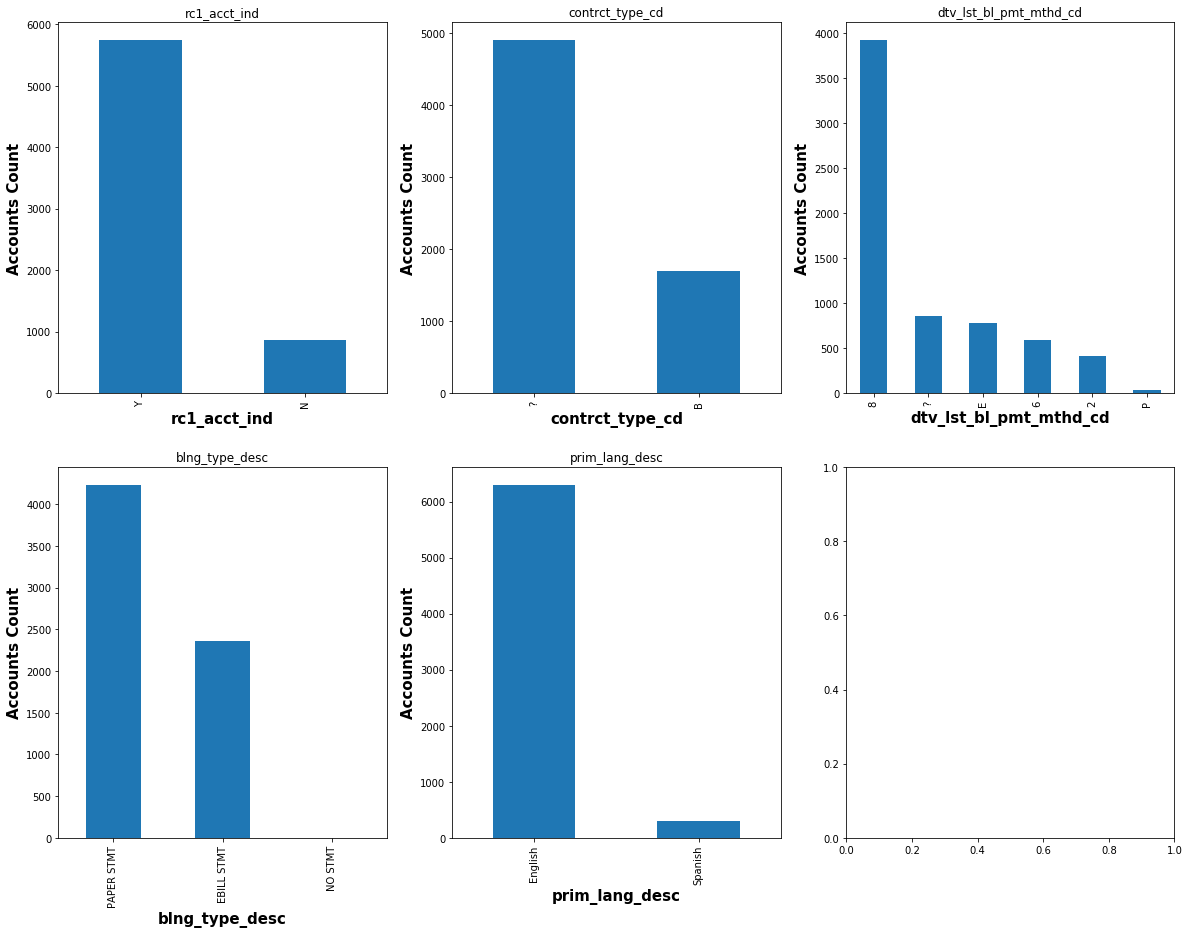

In [16]:
# Let's do Visualization of  Categorical features using BAR Charts

#rc1_acct_ind             
#contrct_type_cd           
#dtv_lst_bl_pmt_mthd_cd    
#blng_type_desc            
#prim_lang_desc            

cat_features = [
"rc1_acct_ind",             
"contrct_type_cd",           
"dtv_lst_bl_pmt_mthd_cd",    
"blng_type_desc",            
"prim_lang_desc"   
]

ROWS, COLS = 2, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 15))
row, col = 0, 0
for i, cat_feat in enumerate(cat_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
  #  clean_churn_df[cat_feat].value_counts().plot('bar', ax=ax[row, col], x= 'Test', y= 'Count')
    clean_churn_df[cat_feat].value_counts().plot('bar', ax=ax[row, col]).set_title(cat_feat)
    ax[row,col].set_xlabel(cat_feat,fontsize = 15,weight = 'bold')
    ax[row,col].set_ylabel("Accounts Count",fontsize = 15, weight = 'bold')


[Text(0, 0.5, ' Accounts Count'), Text(0.5, 0, 'tenure(in days)')]

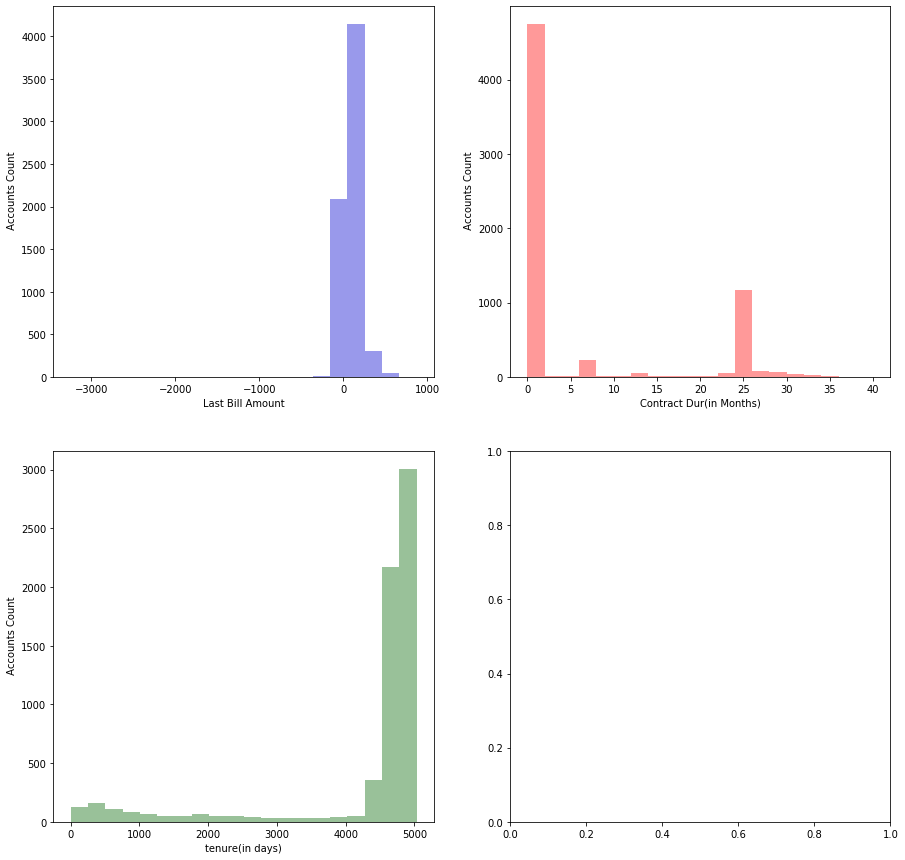

In [17]:
#Let's draw Historgrams on Numerical Variables using Seaborn

# library and data
import seaborn as sns
import matplotlib.pyplot as plt
 
my_num_list = ['dtv_lst_bl_bal_due_amt','lst_cntrct_dur_in_mnth','tenure']
# plot
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)

hist1= sns.distplot(clean_churn_df["dtv_lst_bl_bal_due_amt"] , kde = False, bins = 20,color="mediumblue",hist= True, ax=axes[0,0])
hist1.set(xlabel= 'Last Bill Amount', ylabel=' Accounts Count')

hist2=sns.distplot(clean_churn_df["lst_cntrct_dur_in_mnth"], kde = False, bins = 20,color="red", hist=True,ax=axes[0,1])
hist2.set(xlabel= 'Contract Dur(in Months)', ylabel=' Accounts Count')

hist3=sns.distplot(clean_churn_df["tenure"] ,kde = False, bins = 20,color="darkgreen", hist=True,ax=axes[1,0])
hist3.set(xlabel= 'tenure(in days)', ylabel=' Accounts Count')


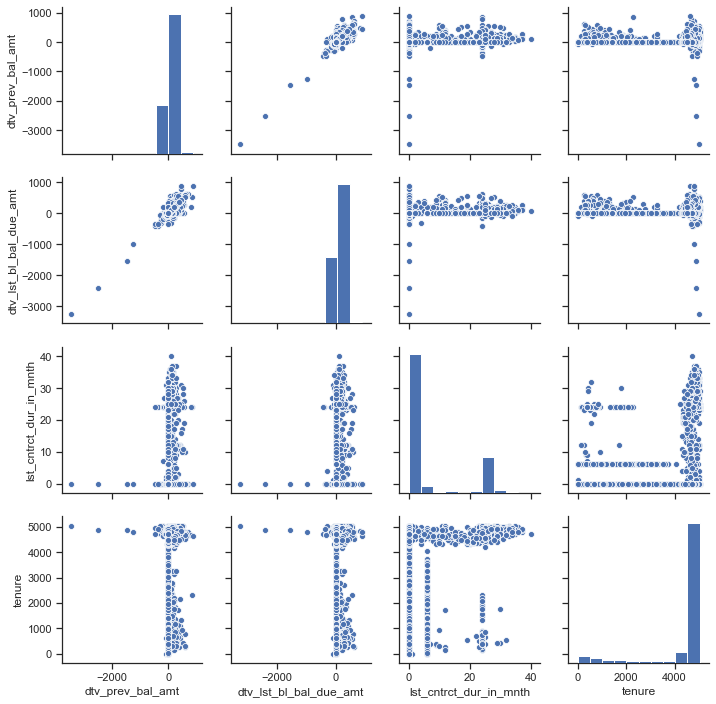

In [18]:
# Visualizing pairwise relationship in a data set in Seaborn
#The pairs plot builds on two basic figures, the histogram and the scatter plot. 
#The histogram on the diagonal allows us to see the distribution of a single variable
#while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables

import seaborn as sns

sns.set(style="ticks", color_codes=True)

sns.pairplot(clean_churn_df)


Text(0, 0.5, 'Accounts Count')

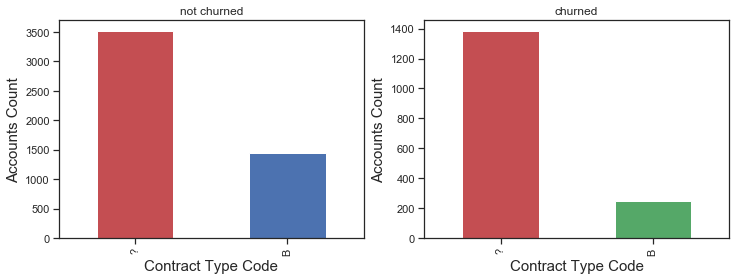

In [19]:
# Let's see the distribution of Contract_type_code in relation to Churn indicator 

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

clean_churn_df[clean_churn_df.Churn == "No"]['contrct_type_cd'].value_counts().plot('bar',color=np.where(clean_churn_df["contrct_type_cd"]== 'B', 'b', 'r'),ax=ax[0]).set_title('not churned')
ax[0].set_xlabel("Contract Type Code",fontsize = 15)
ax[0].set_ylabel("Accounts Count",fontsize = 15)

clean_churn_df[clean_churn_df.Churn == "Yes"]['contrct_type_cd'].value_counts().plot('bar',color=np.where(clean_churn_df["contrct_type_cd"]== 'B', 'g', 'r'),ax=ax[1]).set_title('churned')
ax[1].set_xlabel("Contract Type Code",fontsize = 15)
ax[1].set_ylabel("Accounts Count",fontsize = 15)

# Observation: Customers with No contract("?")  are more likely to churn in future. 
#  Same is true for RC1 DTV Customers(rc1_acct_ind = Y) are more likely to churn more in future

Text(0, 0.5, 'Accounts Count')

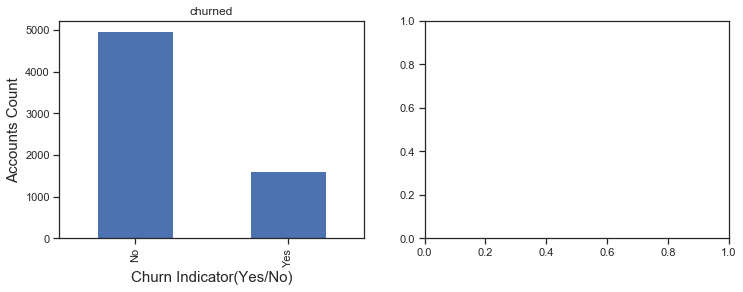

In [20]:
# Check target Variable distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

clean_churn_df["Churn"].value_counts().plot('bar',ax=ax[0],color=np.where(clean_churn_df["Churn"]== 'No', 'b', 'k')).set_title('churned')
ax[0].set_xlabel("Churn Indicator(Yes/No)",fontsize = 15)
ax[0].set_ylabel("Accounts Count",fontsize = 15)


Observation on Target Variable distribution
As we can see the Imblance situation as the # of Not Churned count is higher than Churned count. This could lead to overfitting and  high accuracy as most of the prediction could fall under "Non-Churned"

We do need to mitigate the issue of imbalanced dataset:
- resample data (imbalanced-learn),
- collect more samples,
- use precision and recall as accuracy metrics.
- Use Sagemaker Linear Learner Models with hyperparameter settings -positive_example_weight_mult

### ----------------------------------------------------------------------------------------------------------------------------------------
## Section 3-  Prepare Data


#### Convert all categorical lables to numerical lables as follows:

1. prim_lang_desc: 0= English, 1= Spanish
2. acct_sts_cd: 0 = A, 1= D, M = 2, S = 3
3. dtv_actv_ind: 0 = Y, 1=N
4. blng_type_desc: 0 = PAPER STMT, 1= EBILL STMT, 2= NO STMT
5. rc1_acct_ind: 0 = N, 1= Y
6. contrct_type_cd: 0  = ?, 1 = B
7. dtv_lst_bl_pmt_mthd_cd:  0= E, 1= P, Nan = ?
8. cmbnd_bl_ind : 0 = '?', 1= 'Y'

##### Create new Target reponse variable:Class = 1 if dtv_actv_ind =  1 and acct_sts_cd = 1 (Disconnected)



  


In [21]:
#Convert all categorical lables to numerical lables

clean_churn_df.replace({'acct_sts_cd': {'A':0, 'D':1, 'M':2, 'S':3}}, inplace=True)
clean_churn_df.replace({'prim_lang_desc': {'English':0, 'Spanish':1}}, inplace=True)
clean_churn_df.replace({'dtv_actv_ind': {'N':1, 'Y':0}}, inplace=True)
clean_churn_df.replace({'blng_type_desc': {'PAPER STMT':0, 'EBILL STMT':1,'NO STMT':2}}, inplace=True)
clean_churn_df.replace({'rc1_acct_ind': {'N':0, 'Y':1}}, inplace=True)
clean_churn_df.replace({'contrct_type_cd': {'?':0, 'B':1}}, inplace=True)
clean_churn_df.replace({'dtv_lst_bl_pmt_mthd_cd': {'E':0, 'P':1, '?':9}}, inplace=True)
clean_churn_df.dtv_lst_bl_pmt_mthd_cd = clean_churn_df.dtv_lst_bl_pmt_mthd_cd.astype('int64')
clean_churn_df.replace({'cmbnd_bl_ind': {'?':0, 'Y':1}}, inplace=True)
clean_churn_df.replace({'Churn': {'No':0, 'Yes':1}}, inplace=True)

In [22]:
# dump cleaned-up dataframe to Spreadsheet

clean_churn_df.to_excel("churn_output1.xlsx",sheet_name='Sheet_name_1') 

#### Identify and remove outliers using z-Score

In [23]:
# Use Z-Score to identify and correct outliers in Churn Data Frame

print(clean_churn_df.shape)

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(clean_churn_df))

# print(z)

# define a thrshold to identify outlier
threshold = 3
# print(np.where(z > 3))

# remove outliers 
clean_churn_df = clean_churn_df[(z < 3).all(axis=1)]

print(clean_churn_df.shape)

# dump the final dataframe to excel for rev8iew 
clean_churn_df.to_excel("churn_output2.xlsx",sheet_name='final') 

(6601, 11)
(5988, 11)


In [24]:
# Describe Numerical columns after removing outliers
numerical_features = ["dtv_lst_bl_bal_due_amt","lst_cntrct_dur_in_mnth","tenure"]
clean_churn_df[numerical_features].describe()

,dtv_lst_bl_bal_due_amt,lst_cntrct_dur_in_mnth,tenure
count,5988.000000,5988.000000,5988.000000
mean,106.392702,5.916913,4427.028056
std,88.311254,10.363011,1048.773741
min,-170.590000,0.000000,408.000000
25%,0.000000,0.000000,4675.000000
50%,110.700000,0.000000,4772.500000
75%,161.312500,6.036765,4886.000000
max,446.040000,37.000000,5034.000000


### Normalize Data

Let's standardize the scale of the numerical columns in order to consistently compare the values of different features. We can use a MinMaxScaler to transform the numerical values so that they all fall between 0 and 1.

In [25]:
# scale numerical features into a normalized range, 0-1

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
# store them in this dataframe
churn_scaled=pd.DataFrame(scaler.fit_transform(clean_churn_df.astype(float)))
churn_scaled.columns=clean_churn_df.columns
churn_scaled.index=clean_churn_df.index

churn_scaled.head(10)
#print(churn_scaled.shape)

,prim_lang_desc,blng_type_desc,rc1_acct_ind,dtv_prev_bal_amt,dtv_lst_bl_bal_due_amt,dtv_lst_bl_pmt_mthd_cd,contrct_type_cd,lst_cntrct_dur_in_mnth,cmbnd_bl_ind,tenure,Churn
0,0.0,0.0,1.0,0.688624,0.677100,0.888889,0.0,0.000000,0.0,0.183744,0.0
1,0.0,0.0,1.0,0.513795,0.484813,0.888889,1.0,0.648649,0.0,0.233031,0.0
2,0.0,1.0,1.0,0.522555,0.495873,0.222222,1.0,0.648649,0.0,0.075875,0.0
3,0.0,0.0,1.0,0.501247,0.482153,0.000000,0.0,0.000000,0.0,0.976221,0.0
4,0.0,0.0,1.0,0.758690,0.924298,0.000000,0.0,0.000000,0.0,0.976870,0.0
6,0.0,0.0,1.0,0.522664,0.504435,0.888889,0.0,0.000000,0.0,0.222655,0.0
7,0.0,1.0,1.0,0.523350,0.511522,0.000000,1.0,0.648649,0.0,0.044315,0.0
8,0.0,1.0,1.0,0.445257,0.423901,0.000000,1.0,0.648649,0.0,0.090791,0.0
9,0.0,1.0,1.0,0.562350,0.618280,0.888889,1.0,0.648649,0.0,0.317553,0.0
10,0.0,1.0,1.0,0.534355,0.516598,0.000000,0.0,0.000000,0.0,0.329442,0.0


##  Section 4- Model Data

### --------------------------------------------------------------------------------------------------------------------------------------------------
###  Split the Data into Training and Test 

In [26]:
# Splut the data set  for Training (80%) and test(20%)

Y = churn_scaled["Churn"].values
X = churn_scaled.drop(labels = ["Churn"],axis = 1)

# Create Train & Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

print(Y_train.shape)
print(Y_test.shape)

(4790,)
(1198,)


### --------------------------------------------------------------------------------------------------------------------------------------------------
###  Define and Train a Logistics regression Model 

In [27]:
#Train the Model 

# Set the Classd-weight paramter = balanced, since we have unblanced data set.
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(random_state = 0, solver='lbfgs',class_weight = 'balanced')
result = LRmodel.fit(X_train, Y_train)


###  Validate and Evaluate the Model


In [28]:
# let's perform K-fold cross validation - To evaluate Estimator performance/prevent overfitting

# in k-fold CV, the training set is split into k smaller sets.The following procedure is followed for each of the k “folds”:
    #. A model is trained using k-1 of the fold as training data
    # The resulting model is validated on the remaining part of the data- It is used as test set to compute the performance measure
    #The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.
   
# When the cv argument is an integer, cross_val_score uses the KFold or StratifiedKFold strategies by default

from sklearn import svm
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LRmodel, X_train, Y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



[0.82064651 0.8561001  0.84133612 0.84639498 0.85684431]
Accuracy: 0.84 (+/- 0.03)


### ------------------------------------------------------------------------------------------------------------------------------------------------
###  Test  the Model

In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


test_preds = LRmodel.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(Y_test, test_preds))


0.8397328881469115


In [30]:
# Create Confusion Matrix

actual = Y_test
predicted = test_preds

results = confusion_matrix(actual, predicted) 

# Confusion Matrix
#  TP,FN
#  FP,TN
# Accuracy = (TP+TN)/(TP+TN+FP+FN)
# Recall: = TP  / (TP +FN)
# Precision = TP /(TP+FP)

print ("Confusion Matrix :")
print(results) 

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_test, test_preds))

# Model Precision
print("Precision:",metrics.precision_score(Y_test, test_preds))

# Model Recall
print("Recall:",metrics.recall_score(Y_test, test_preds))

#print ("Report : ",classification_report(actual, predicted)) 

#-----------------------------------------------------------
## print out the array of predicted and true labels, if you want
print('\nPredicted class labels: ')
print(test_preds)
print('\nTrue class labels: ')
print(Y_test)

Confusion Matrix :
[[760 160]
 [ 32 246]]
Accuracy: 0.8397328881469115
Precision: 0.6059113300492611
Recall: 0.8848920863309353

Predicted class labels: 
[0. 1. 1. ... 1. 1. 1.]

True class labels: 
[0. 0. 0. ... 1. 1. 0.]


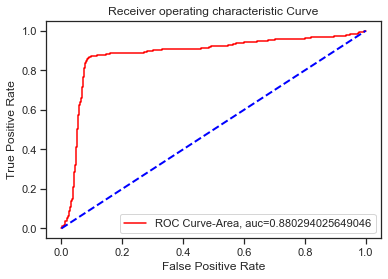

In [31]:
# Let's draw ROC Curve
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate.  
# It shows the tradeoff between sensitivity and specificity.
#tpr (True Positive Rate) = # True positives / # positives = Recall = TP / (TP+FN)
#fpr(False Positive Rate) = # False Positives / # negatives = FP / (FP+TN)

#AUC score for the case is 0.86

y_pred_prob = LRmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_prob)
auc = metrics.roc_auc_score(Y_test, y_pred_prob)

plt.figure()
lw = 2
plt.plot(fpr,tpr,color = 'red',label="ROC Curve-Area, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')

plt.legend(loc=4)
plt.show()



In [32]:
#  get the weights of all the variables to know which features has most influence on predicted outcome

weights = pd.Series(LRmodel.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

contrct_type_cd           0.749919
dtv_lst_bl_pmt_mthd_cd    0.689536
rc1_acct_ind              0.491133
blng_type_desc            0.191511
cmbnd_bl_ind              0.000000
prim_lang_desc            0.000000
tenure                   -1.206325
lst_cntrct_dur_in_mnth   -1.653883
dtv_prev_bal_amt         -2.711936
dtv_lst_bl_bal_due_amt   -9.330905
dtype: float64

### --------------------------------------------------------------------------------------------------------------------------------------------------
## Section 5- Results